In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = False
nweeks = 41

data = pd.read_csv('empreinteCarboneDeplacementDT_2022121.tsv', sep='\t', index_col=0)
data

,Jours de déplacement,Statut,Marche JT1 (Km),Vélo JT1 (Km),Vélo électrique JT1 (Km),trottinette électrique JT1 (Km),2 roues motorisées JT1 (Km),Voiture JT1 (Km),Bus JT1 (Km),Tramway JT1 (Km),...,Vélo électrique (kg eCO2),trottinette électrique (kg eCO2),2 roues motorisées (kg eCO2),Voiture (kg eCO2),Bus (kg eCO2),Tramway (kg eCO2),Train (kg eCO2),RER (kg eCO2),Métro (kg eCO2),Total (kg eCO2)
seqID,,,,,,,,,,,,,,,,,,,,,
52392,5,researcher,0,12,0,0,0,0,0,0,...,0,0,0,0,0,0,258,0,0,271
52393,3,researcher,0,0,0,0,0,138,0,0,...,0,0,0,4772,0,0,0,0,0,4772
52394,5,researcher,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
52395,5,engineer,0,18,0,0,0,0,0,0,...,0,0,0,85,0,0,0,0,0,100
52396,5,researcher,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52807,3,researcher,0,0,0,0,0,80,0,0,...,0,0,0,1799,0,0,0,0,0,1799
52808,5,researcher,0,0,0,0,0,80,0,0,...,0,0,0,2998,0,0,0,0,0,2998
52809,5,researcher,0,0,0,0,0,8,0,0,...,0,0,134,113,0,0,0,0,0,248


In [25]:
colnames = np.array(data.columns)
colnames

array(['Jours de déplacement', 'Statut', 'Marche JT1 (Km)',
       'Vélo JT1 (Km)', 'Vélo électrique JT1 (Km)',
       'trottinette électrique JT1 (Km)', '2 roues motorisées JT1 (Km)',
       'Voiture JT1 (Km)', 'Bus JT1 (Km)', 'Tramway JT1 (Km)',
       'Train JT1 (Km)', 'RER JT1 (Km)', 'Métro JT1 (Km)', 'Jours JT2',
       'Marche JT2 (Km)', 'Vélo JT2 (Km)', 'Vélo électrique JT2 (Km)',
       'trottinette électrique JT2 (Km)', '2 roues motorisées JT2 (Km)',
       'Voiture JT2 (Km)', 'Bus JT2 (Km)', 'Tramway JT2 (Km)',
       'Train JT2 (Km)', 'RER JT2 (Km)', 'Métro JT2 (Km)',
       'Marche (kg eCO2)', 'Vélo (kg eCO2)', 'Vélo électrique (kg eCO2)',
       'trottinette électrique (kg eCO2)', '2 roues motorisées (kg eCO2)',
       'Voiture (kg eCO2)', 'Bus (kg eCO2)', 'Tramway (kg eCO2)',
       'Train (kg eCO2)', 'RER (kg eCO2)', 'Métro (kg eCO2)',
       'Total (kg eCO2)'], dtype=object)

## Extract the types of transportation

In [26]:
pattern = '(.*) JT1.*'
types = []
regexp = re.compile(pattern)
for t in colnames:
    test = regexp.match(t)
    if(test):
        types.append(test.groups()[0])
types

['Marche',
 'Vélo',
 'Vélo électrique',
 'trottinette électrique',
 '2 roues motorisées',
 'Voiture',
 'Bus',
 'Tramway',
 'Train',
 'RER',
 'Métro']

## Summing JT1 and JT2 values

In [27]:
jours_jt2 = data['Jours JT2']
jours_jt2

seqID
52392    0
52393    1
52394    0
52395    1
52396    0
        ..
52807    0
52808    0
52809    2
53008    0
53058    0
Name: Jours JT2, Length: 121, dtype: int64

In [28]:
jours_jt1 = data['Jours de déplacement'] - jours_jt2
data['Jours JT1'] = jours_jt1
data.loc[:, ['Jours de déplacement', 'Jours JT1', 'Jours JT2']]

,Jours de déplacement,Jours JT1,Jours JT2
seqID,,,
52392,5,5,0
52393,3,2,1
52394,5,5,0
52395,5,4,1
52396,5,5,0
...,...,...,...
52807,3,3,0
52808,5,5,0
52809,5,3,2


First we compute the weekly distance by multiplying the duration of JT1 and JT2 by the associated distances. Then we convert it from weekly to yearly distances by multiplying by 41 (value taken from Labo1.5)

In [29]:
for t in types[:]:
    pattern = '%s JT[1-2] \(Km\)' %t
    regexp = re.compile(pattern)
    test = np.array([(regexp.match(c) is not None) & ('Km' in c) for c in colnames])
    icol = np.nonzero(test)[0]
    temp = data.iloc[:, icol]
    output = (data.iloc[:, icol[0]].values * jours_jt1.values + data.iloc[:, icol[1]].values * jours_jt2.values) * nweeks
    data['%s (Km)' %t] = output

In [30]:
distance_cols = []
emissions_cols = []
for t in types:
    temp = '%s (Km)' %t
    distance_cols.append(temp)
    temp = '%s (kg eCO2)' %t
    emissions_cols.append(temp)

Now we verify that the values are ok, by taking values for ID=52395

In [31]:
data.loc[52395, distance_cols].sum()

3321

## Plotting pie charts

In [32]:
test = data.sum(axis=0)
test

Jours de déplacement                                                              544
Statut                              researcherresearcherresearcherengineerresearch...
Marche JT1 (Km)                                                                    32
Vélo JT1 (Km)                                                                     492
Vélo électrique JT1 (Km)                                                           45
trottinette électrique JT1 (Km)                                                     0
2 roues motorisées JT1 (Km)                                                        59
Voiture JT1 (Km)                                                                 2565
Bus JT1 (Km)                                                                       55
Tramway JT1 (Km)                                                                   29
Train JT1 (Km)                                                                    533
RER JT1 (Km)                                          

In [33]:
distance = test.loc[distance_cols]
distance

Marche (Km)                      7011
Vélo (Km)                       78638
Vélo électrique (Km)             6232
trottinette électrique (Km)       328
2 roues motorisées (Km)         12546
Voiture (Km)                   452230
Bus (Km)                        11603
Tramway (Km)                     4961
Train (Km)                     152151
RER (Km)                         3485
Métro (Km)                          0
dtype: object

In [34]:
emissions = test.loc[emissions_cols]
emissions

Marche (kg eCO2)                        0
Vélo (kg eCO2)                        389
Vélo électrique (kg eCO2)             100
trottinette électrique (kg eCO2)       20
2 roues motorisées (kg eCO2)         2570
Voiture (kg eCO2)                   99200
Bus (kg eCO2)                        1811
Tramway (kg eCO2)                      29
Train (kg eCO2)                      2737
RER (kg eCO2)                          18
Métro (kg eCO2)                         0
dtype: object

In [35]:
cmap = plt.cm.Spectral
ntypes = len(types)
colors = []
for i in range(0, ntypes):
    iii = (i) /  (ntypes - 1)
    colors.append(cmap(iii))

In [36]:
fig = plt.figure(figsize=(12, 12), facecolor='white')
p, t = plt.pie(distance, labels=None, colors=colors, wedgeprops={'edgecolor': 'k', 'linewidth': 1})
plt.legend(p, types, ncol=len(types) // 3, loc='best')
plt.title('Distance (km)')
plt.savefig('deplacement_distance.png')
plt.close(fig)

In [37]:
fig = plt.figure(figsize=(12, 12), facecolor='white')
p, t = plt.pie(emissions, labels=None, colors=colors, wedgeprops={'edgecolor': 'k', 'linewidth': 1})
plt.legend(p, types, ncol=len(types) // 3, loc='best')
plt.title('Emissions (kg eCO2)')
plt.savefig('deplacement_emissions.png')
plt.close(fig)

## Plotting 1.5 bar plot

In [38]:
import brewster
colors = brewster.colors

In [39]:
test = data.groupby('Statut').sum()
test = test.loc[['researcher', 'engineer', 'student'], :]
test.loc[:, distance_cols]

,Marche (Km),Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,
researcher,1886,44772,1230,328,1476,295528,1025,656,128125,0,0
engineer,410,24641,3362,0,11070,149896,7503,1025,24026,3485,0
student,4715,9225,1640,0,0,6806,3075,3280,0,0,0


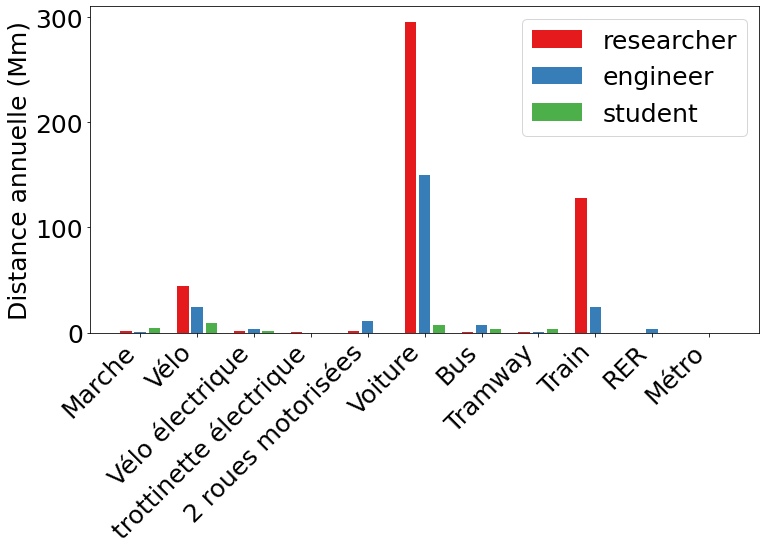

In [40]:
fig = plt.figure(facecolor='white', figsize=(12, 6))
plt.rcParams['font.size'] = 25
ax = plt.gca()
x = np.array([0, 5, 10])
offset = 20
width = 4
xlabels = []
for c in distance_cols:
    l = plt.bar(x, test[c] / 1000, width=width, color=colors)
    xlabels.append(x[1])
    x += offset

ax.set_xticks(xlabels)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.ylabel('Distance annuelle (Mm)')

plt.legend(l, test.index)
plt.savefig('distance_by_cat.png', bbox_inches='tight')

In [41]:
totsum = data.sum(axis=0)
totsum

Jours de déplacement                                                              544
Statut                              researcherresearcherresearcherengineerresearch...
Marche JT1 (Km)                                                                    32
Vélo JT1 (Km)                                                                     492
Vélo électrique JT1 (Km)                                                           45
trottinette électrique JT1 (Km)                                                     0
2 roues motorisées JT1 (Km)                                                        59
Voiture JT1 (Km)                                                                 2565
Bus JT1 (Km)                                                                       55
Tramway JT1 (Km)                                                                   29
Train JT1 (Km)                                                                    533
RER JT1 (Km)                                          

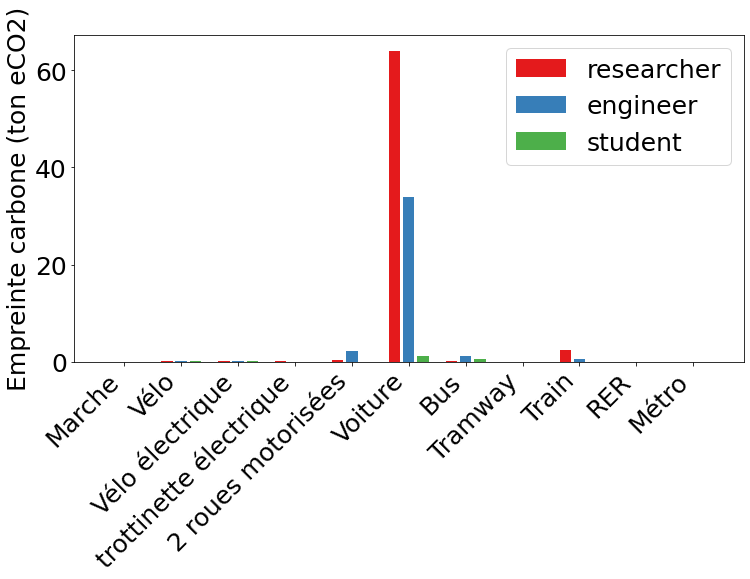

In [42]:
fig = plt.figure(facecolor='white', figsize=(12, 6))
plt.rcParams['font.size'] = 25
ax = plt.gca()
x = np.array([0, 5, 10])
offset = 20
width = 4
xlabels = []
for c in emissions_cols:
    l = plt.bar(x, test[c] / 1000, width=width, color=colors)
    xlabels.append(x[1])
    x += offset

ax.set_xticks(xlabels)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.ylabel('Empreinte carbone (ton eCO2)')

plt.legend(l, test.index)
plt.savefig('emssions_by_cat.png', bbox_inches='tight')

In [55]:
emissions = test.loc[:, emissions_cols]
emissions

,Marche (kg eCO2),Vélo (kg eCO2),Vélo électrique (kg eCO2),trottinette électrique (kg eCO2),2 roues motorisées (kg eCO2),Voiture (kg eCO2),Bus (kg eCO2),Tramway (kg eCO2),Train (kg eCO2),RER (kg eCO2),Métro (kg eCO2)
Statut,,,,,,,,,,,
researcher,0,220,20,20,302,64005,160,4,2305,0,0
engineer,0,124,54,0,2268,33975,1171,6,432,18,0
student,0,45,26,0,0,1220,480,19,0,0,0


In [57]:
emissions_tot = np.sum(emissions.values)
emissions_tot

106874

In [58]:
emissions_norm = (emissions / emissions_tot) * 100
emissions_norm

,Marche (kg eCO2),Vélo (kg eCO2),Vélo électrique (kg eCO2),trottinette électrique (kg eCO2),2 roues motorisées (kg eCO2),Voiture (kg eCO2),Bus (kg eCO2),Tramway (kg eCO2),Train (kg eCO2),RER (kg eCO2),Métro (kg eCO2)
Statut,,,,,,,,,,,
researcher,0.0,0.205850,0.018714,0.018714,0.282576,59.888280,0.149709,0.003743,2.156745,0.000000,0.0
engineer,0.0,0.116024,0.050527,0.000000,2.122125,31.789771,1.095683,0.005614,0.404214,0.016842,0.0
student,0.0,0.042106,0.024328,0.000000,0.000000,1.141531,0.449127,0.017778,0.000000,0.000000,0.0


0 researcher
1 engineer
2 student


Text(0.5, 0, '% des emissions')

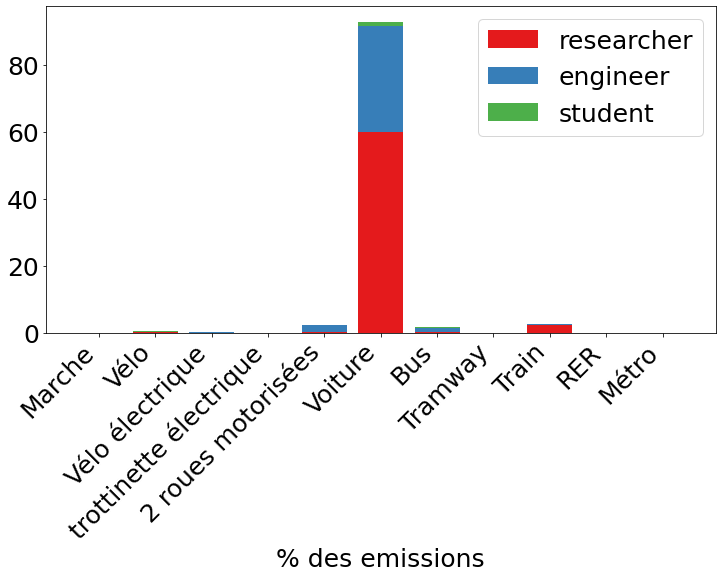

In [80]:
fig = plt.figure(facecolor='white', figsize=(12, 6))
ax = plt.gca()
x = np.arange(0, len(types))
index = emissions_norm.index
index
temp = 0
lll = []
for i in range(len(index)):
    print(i, index[i])
    l = plt.bar(x, emissions_norm.loc[index[i], :], bottom=temp, color=colors[i])
    lll.append(l)
    temp += emissions_norm.loc[index[i], :]
t = ax.set_xticks(x)
ax.set_xticklabels(types, ha='right', rotation=45)
plt.legend(lll, index)
plt.xlabel('% des emissions')

In [81]:
emissions_norm.sum(axis=0)

Marche (kg eCO2)                     0.000000
Vélo (kg eCO2)                       0.363980
Vélo électrique (kg eCO2)            0.093568
trottinette électrique (kg eCO2)     0.018714
2 roues motorisées (kg eCO2)         2.404701
Voiture (kg eCO2)                   92.819582
Bus (kg eCO2)                        1.694519
Tramway (kg eCO2)                    0.027135
Train (kg eCO2)                      2.560960
RER (kg eCO2)                        0.016842
Métro (kg eCO2)                      0.000000
dtype: float64

In [83]:
distances = test.loc[:, distance_cols]
distances

,Marche (Km),Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,
researcher,1886,44772,1230,328,1476,295528,1025,656,128125,0,0
engineer,410,24641,3362,0,11070,149896,7503,1025,24026,3485,0
student,4715,9225,1640,0,0,6806,3075,3280,0,0,0


In [84]:
distances_tot = np.sum(distances.values)
distances_tot

729185

In [90]:
distances_norm = distances / distances_tot * 100
distances_norm

,Marche (Km),Vélo (Km),Vélo électrique (Km),trottinette électrique (Km),2 roues motorisées (Km),Voiture (Km),Bus (Km),Tramway (Km),Train (Km),RER (Km),Métro (Km)
Statut,,,,,,,,,,,
researcher,0.258645,6.140006,0.168681,0.044982,0.202418,40.528535,0.140568,0.089963,17.570987,0.000000,0.0
engineer,0.056227,3.379252,0.461063,0.000000,1.518133,20.556649,1.028957,0.140568,3.294911,0.477931,0.0
student,0.646612,1.265111,0.224909,0.000000,0.000000,0.933371,0.421704,0.449817,0.000000,0.000000,0.0


In [91]:
distances_norm.sum(axis=0)

Marche (Km)                     0.961484
Vélo (Km)                      10.784369
Vélo électrique (Km)            0.854653
trottinette électrique (Km)     0.044982
2 roues motorisées (Km)         1.720551
Voiture (Km)                   62.018555
Bus (Km)                        1.591229
Tramway (Km)                    0.680349
Train (Km)                     20.865898
RER (Km)                        0.477931
Métro (Km)                      0.000000
dtype: float64